In [6]:
from google.colab import files
uploaded = files.upload()

Saving ed_database.db to ed_database.db


In [11]:
import sqlite3
import pandas as pd

# If your DB name/path is different, change here:
db_path = "ed_database.db"

conn = sqlite3.connect(db_path)

# Aggregate cleaning log by issue_type
df_issue = pd.read_sql("""
    SELECT issue_type,
           SUM(rows_affected) AS rows_affected
    FROM cleaning_log
    GROUP BY issue_type
    ORDER BY rows_affected DESC;
""", conn)

conn.close()

print(df_issue)

# Add percentage column
total_cleaned = df_issue["rows_affected"].sum()
df_issue["percentage"] = df_issue["rows_affected"] / total_cleaned * 100
df_issue


      issue_type  rows_affected
0     invalid_fk           4723
1  missing_value            882
2   out_of_range            778
3   invalid_enum            533
4     header_row              7
5     invalid_id              0


,issue_type,rows_affected,percentage
0,invalid_fk,4723,68.221869
1,missing_value,882,12.740142
2,out_of_range,778,11.237903
3,invalid_enum,533,7.698974
4,header_row,7,0.101112
5,invalid_id,0,0.000000


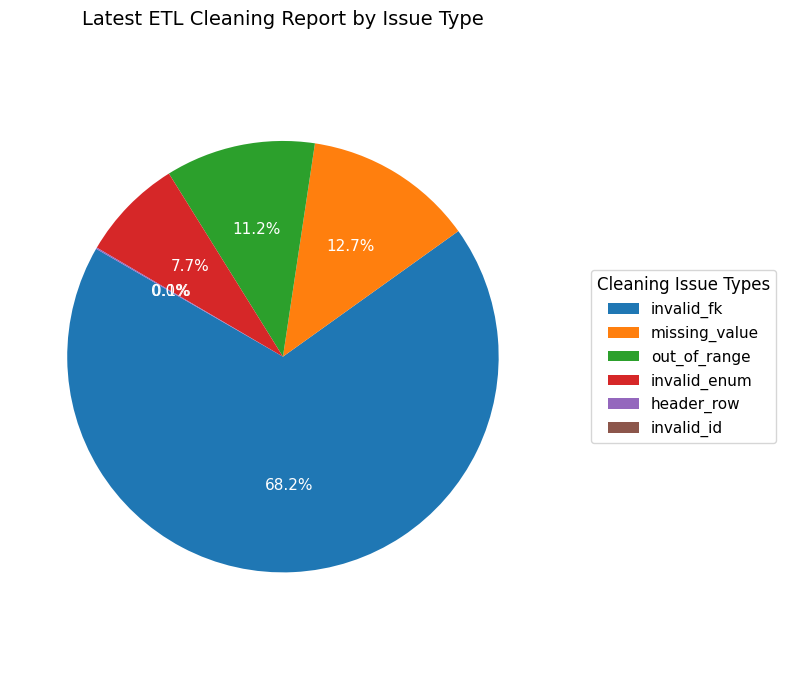

In [12]:
import matplotlib.pyplot as plt

labels = df_issue["issue_type"].tolist()
sizes = df_issue["percentage"].tolist()

plt.figure(figsize=(8, 7))

# Pie chart – no labels on slices (just %), legend on the side
patches, texts, autotexts = plt.pie(
    sizes,
    autopct='%1.1f%%',
    startangle=150,
    textprops={'fontsize': 12},
)

# Make percentage text readable
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontsize(11)

# Legend with issue types
plt.legend(
    patches,
    labels,
    title="Cleaning Issue Types",
    loc="center left",
    bbox_to_anchor=(1.05, 0.5),
    fontsize=11,
    title_fontsize=12
)

plt.title("Latest ETL Cleaning Report by Issue Type", fontsize=14)
plt.axis("equal")  # keep it a circle
plt.tight_layout()
plt.show()
